In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px 
from datetime import datetime

In [4]:
df = pd.read_excel("C:/Users/Daksh/Desktop/dakshpy/bankloananalysis/financial_loan.xlsx")
print(df.head())
print(df.describe())
print(df.info())
print(df.shape)
print(df.dtypes)

        id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-02-11            2021-09-13        2021-04-13   
1     E           RENT 2021-01-01            2021-12-14        2021-01-15   
2     C           RENT 2021-01-05            2021-12-12        2021-01-09   
3     B       MORTGAGE 2021-02-25            2021-12-12        2021-03-12   
4     A       MORTGAGE 2021-01-01            2021-12-14        2021-01-15   

   ... sub_grade        term  verification_status annual_incom

In [5]:
total_loan_application= df['id'].count()
print(total_loan_application, "total_loan_application")

38576 total_loan_application


In [6]:
#MTD total Loan Applications
latest_issued_date = df['issue_date'].max()
latest_year = latest_issued_date.year
latest_month = latest_issued_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application = mtd_data['id'].count()
print(f"MTD Loan Application (for {latest_issued_date.strftime('%B %Y')}):{mtd_loan_application}")


MTD Loan Application (for December 2021):4314


In [7]:
#Total Funded Amount
total_funded_amount=df['loan_amount'].sum()/1000000
print("total_funded_amount: ${:.2f}M".format(total_funded_amount))

total_funded_amount: $435.76M


In [8]:
#MTD total Funded Amount
latest_issued_date = df['issue_date'].max()
latest_year = latest_issued_date.year
latest_month = latest_issued_date.month
mtd_date = df[(df['issue_date']. dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_funded_amount= mtd_date['loan_amount'].sum()/1000000
print("mtd_funded_amount: ${:.2f}M".format(mtd_funded_amount))

mtd_funded_amount: $53.98M


In [9]:
#Total Amount Received

total_amount_received = df['total_payment'].sum()/1000000
print("total_amount_received: ${: .2f}M" .format(total_amount_received))

total_amount_received: $ 473.07M


In [10]:
#MTD total Amount Received
latest_issued_date = df['issue_date'].max()
latest_year = latest_issued_date.year
latest_month = latest_issued_date.month
mtd_date = df[(df['issue_date']. dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_amount_recevied = mtd_date['total_payment'].sum()/1000000
print("mtd_amount_recevied: ${:.2f}M".format(mtd_amount_recevied))

mtd_amount_recevied: $58.07M


In [11]:
#Average intrest Rate
avg_intrest = df['int_rate'].mean()*100
print("Average Intrest:{: .2f}%" .format(avg_intrest))

#Average Debt-to-Income Ratio
avg_dti = df['dti'].mean()*100
print("Average DTI :{:.2f}%" .format(avg_dti))

Average Intrest: 12.05%
Average DTI :13.33%


In [12]:
#Good loans 
good_loan = df[df['loan_status'].isin(["Fully Paid", "Current"])]
no_of_good_loan= good_loan['id'].count()
print("no_of_good_loan", no_of_good_loan)
good_loan_fund= good_loan['loan_amount'].sum()/1000000
print("good Loan fund:${: .2f}M" .format(good_loan_fund))
good_loan_amount= good_loan['total_payment'].sum()/1000000
print("good Loan amount:${: .2f}M" .format(good_loan_amount))
pct_good_loan = no_of_good_loan/total_loan_application*100
print("pct_good_loan: {:.2f}%".format(pct_good_loan))

no_of_good_loan 33243
good Loan fund:$ 370.22M
good Loan amount:$ 435.79M
pct_good_loan: 86.18%


In [13]:
#bad loans 
bad_loan = df[df['loan_status'].isin(["Charged Off"])]
no_of_bad_loan= bad_loan['id'].count()
print("no_of_bad_loan", no_of_bad_loan)
bad_loan_fund= bad_loan['loan_amount'].sum()/1000000
print("bad Loan fund:${: .2f}M" .format(bad_loan_fund))
bad_loan_amount= bad_loan['total_payment'].sum()/1000000
print("bad Loan amount:${: .2f}M" .format(bad_loan_amount))
pct_bad_loan = no_of_bad_loan/total_loan_application*100
print("pct_bad_loan: {:.2f}%".format(pct_bad_loan))


no_of_bad_loan 5333
bad Loan fund:$ 65.53M
bad Loan amount:$ 37.28M
pct_bad_loan: 13.82%


In [14]:
#Portfolio Default Rate
total_application = df['id'].count
defaul_rate= no_of_bad_loan/total_loan_application*100
print("Portfolio default rate = {:.2f}%".format(defaul_rate))


Portfolio default rate = 13.82%


In [15]:
#Average Time to Repayment
average_time_repayment= (df['issue_date']-df['last_payment_date']).dt.days
mean_repayment= average_time_repayment.mean()
print("average time to repay {:.0f}Days".format(mean_repayment))


average time to repay 20Days


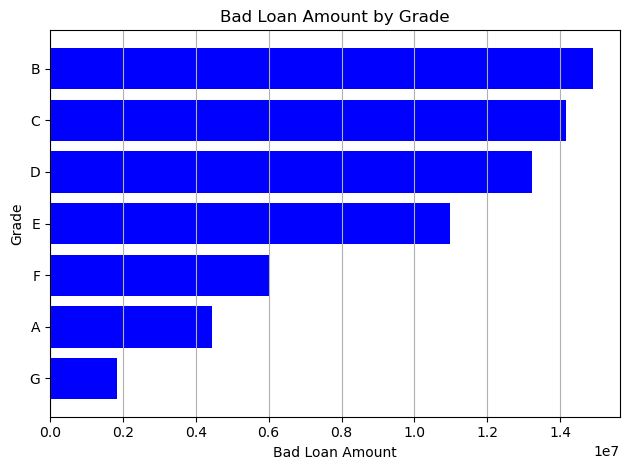

In [16]:

# Segmented Loss Rate (Bad Loan Analysis) (by grade, state, home ownership, purpose, term, verification sts, intrest rate, loan amount)
# grade
charge_off = df[df['loan_status'] == "Charged Off"]  
charge_off_grade = charge_off.groupby('grade')['loan_amount'].sum().sort_values()
plt.barh(charge_off_grade.index, charge_off_grade.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('Grade')
plt.title('Bad Loan Amount by Grade')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

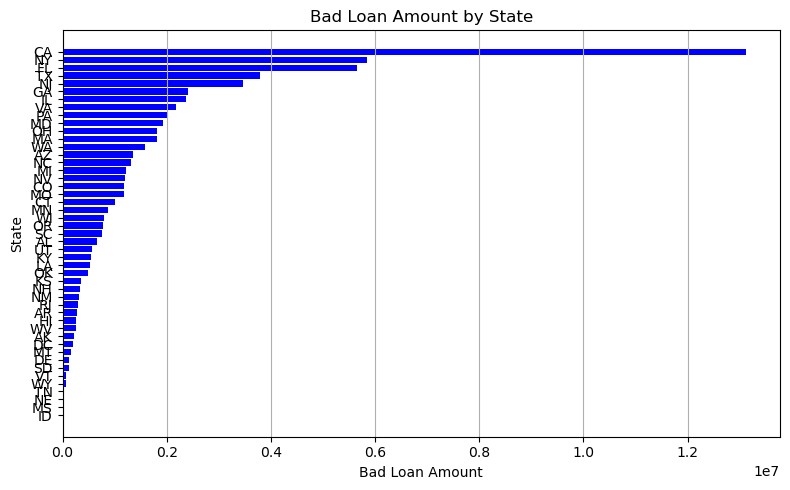

In [17]:
#state
charge_off_state = charge_off.groupby('address_state')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(charge_off_state.index, charge_off_state.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('State')
plt.title('Bad Loan Amount by State')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


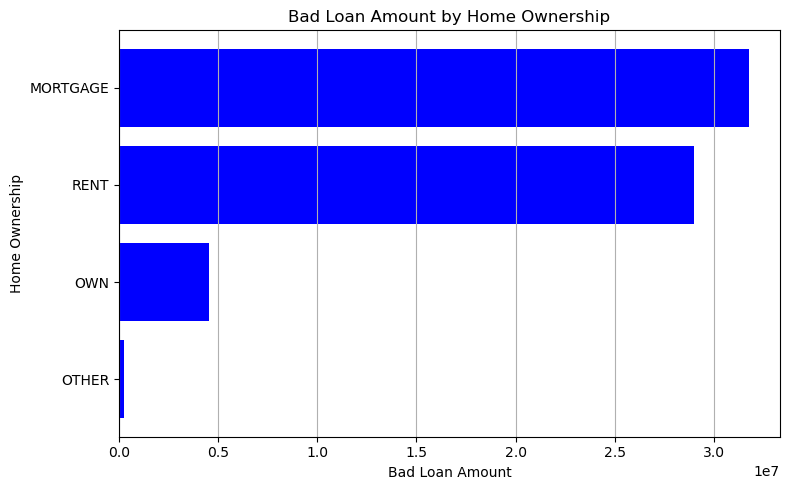

In [18]:
#home ownership
charge_off_home_ownership = charge_off.groupby('home_ownership')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(charge_off_home_ownership.index, charge_off_home_ownership.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('Home Ownership')
plt.title('Bad Loan Amount by Home Ownership')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

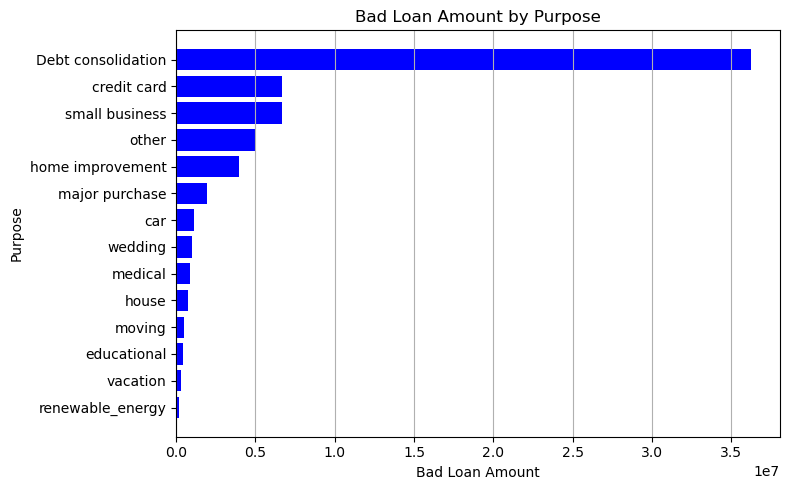

In [19]:
#purpose
charge_off_purpose = charge_off.groupby('purpose')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(charge_off_purpose.index, charge_off_purpose.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('Purpose')
plt.title('Bad Loan Amount by Purpose')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

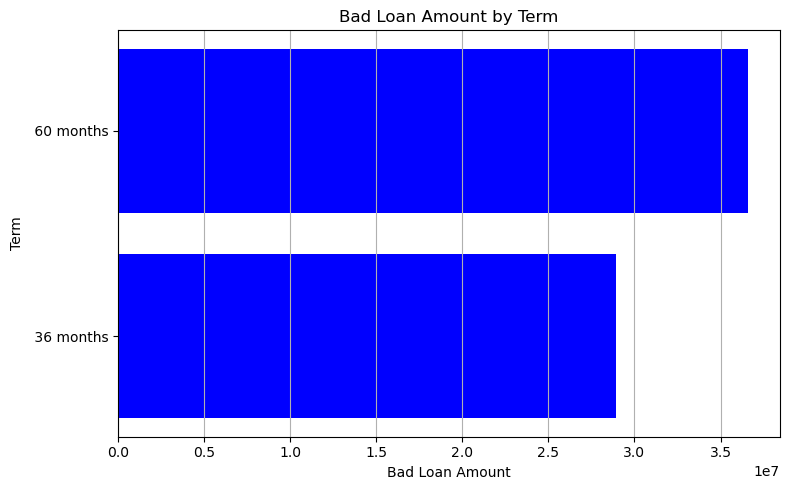

In [20]:
#term
charge_off_term = charge_off.groupby('term')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(charge_off_term.index, charge_off_term.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('Term')
plt.title('Bad Loan Amount by Term')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

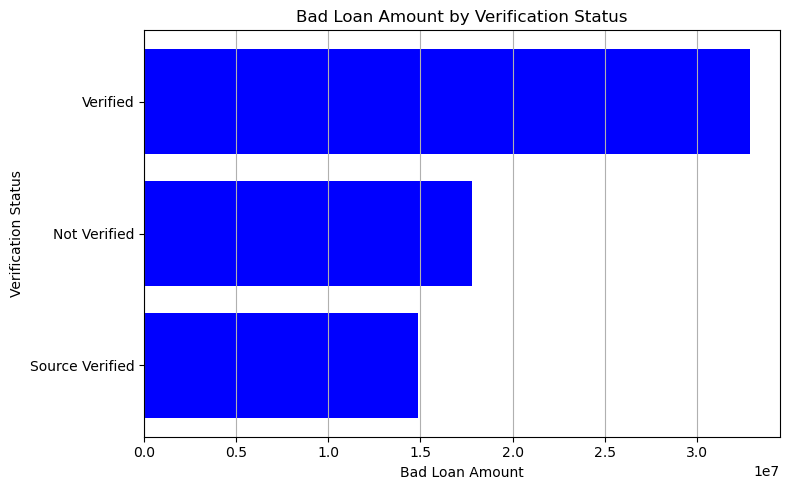

In [21]:
#verification sts
charge_off_vfs = charge_off.groupby('verification_status')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(charge_off_vfs.index, charge_off_vfs.values, color='blue')
plt.xlabel('Bad Loan Amount')
plt.ylabel('Verification Status')
plt.title('Bad Loan Amount by Verification Status')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


0.0542 0.244


C:\Users\Daksh\AppData\Local\Temp\ipykernel_15176\225831584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charge_off['int_rate'] = charge_off['int_rate'] * 100


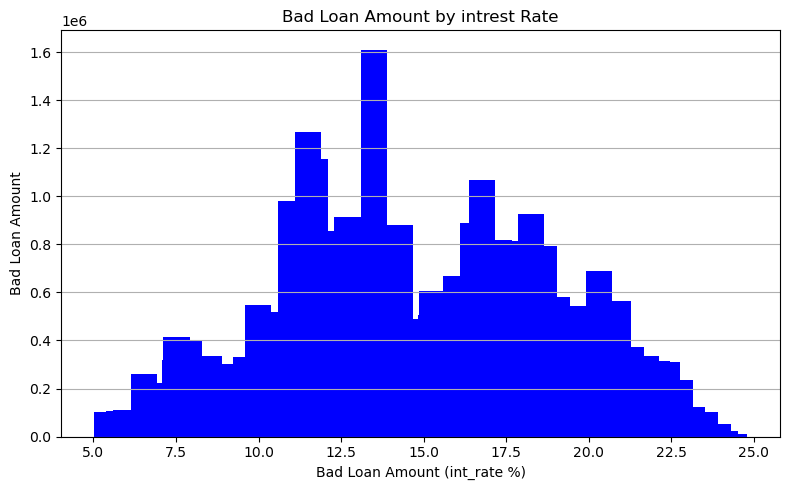

In [22]:
#intrest rate

print(df['int_rate'].min(), charge_off['int_rate'].max())
if charge_off['int_rate'].max() <= 1.0:
     charge_off['int_rate'] = charge_off['int_rate'] * 100
    
charge_off_int_rate = charge_off.groupby('int_rate')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(charge_off_int_rate.index, charge_off_int_rate.values, color='blue')
plt.xlabel("Bad Loan Amount (int_rate %)")
plt.ylabel("Bad Loan Amount")
plt.title('Bad Loan Amount by intrest Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

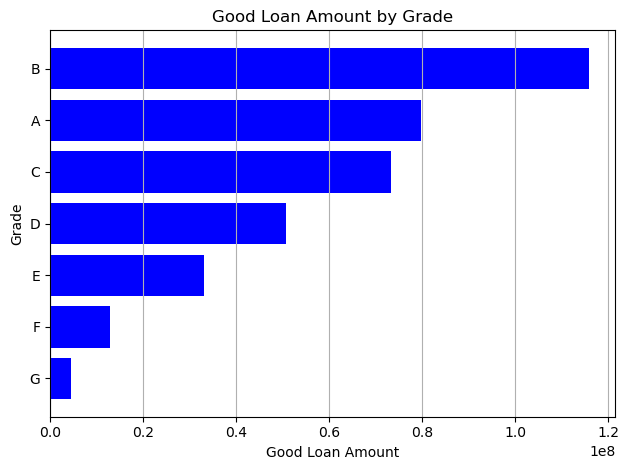

In [23]:
#Segmented Profit Rate (Good Loan Analysis) (by grade, state, home ownership, purpose, term, verification sts, intrest rate, loan amount)
#grade

paid_off = df[df['loan_status'].isin(["Fully Paid", "Current"])]
paid_off_grade = paid_off.groupby('grade')['loan_amount'].sum().sort_values()
plt.barh(paid_off_grade.index, paid_off_grade.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('Grade')
plt.title('Good Loan Amount by Grade')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


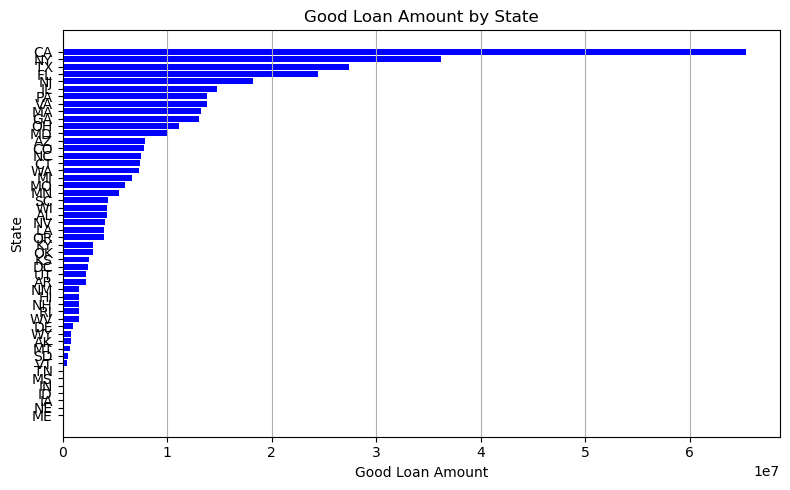

In [24]:
#state
paid_off_state = paid_off.groupby('address_state')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(paid_off_state.index, paid_off_state.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('State')
plt.title('Good Loan Amount by State')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


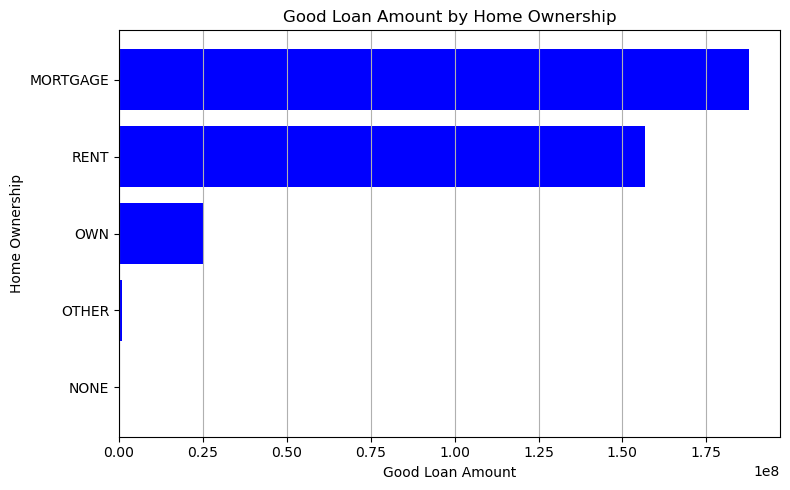

In [25]:
#home ownership
paid_off_off_home_ownership = paid_off.groupby('home_ownership')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(paid_off_off_home_ownership.index, paid_off_off_home_ownership.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('Home Ownership')
plt.title('Good Loan Amount by Home Ownership')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

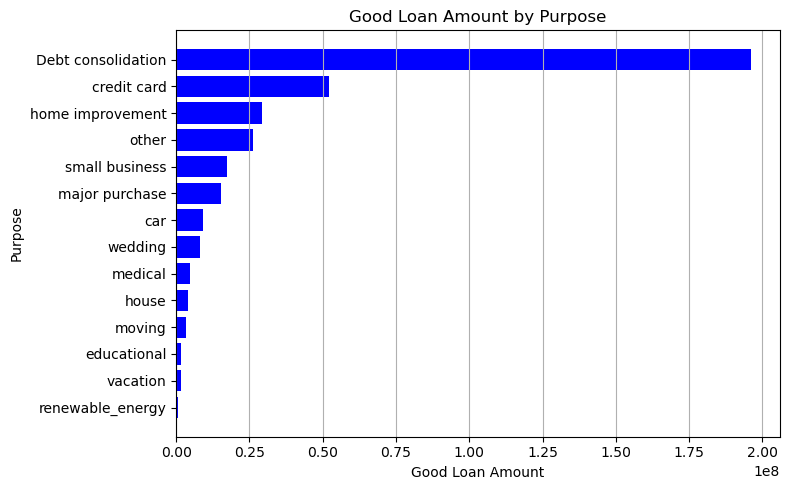

In [26]:
#purpose
paid_off_purpose = paid_off.groupby('purpose')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(paid_off_purpose.index, paid_off_purpose.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('Purpose')
plt.title('Good Loan Amount by Purpose')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


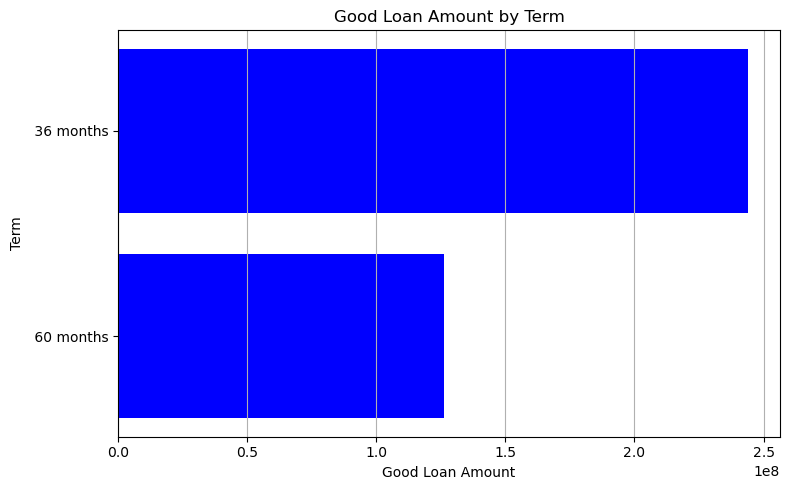

In [27]:
#term
paid_off_term = paid_off.groupby('term')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(paid_off_term.index, paid_off_term.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('Term')
plt.title('Good Loan Amount by Term')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

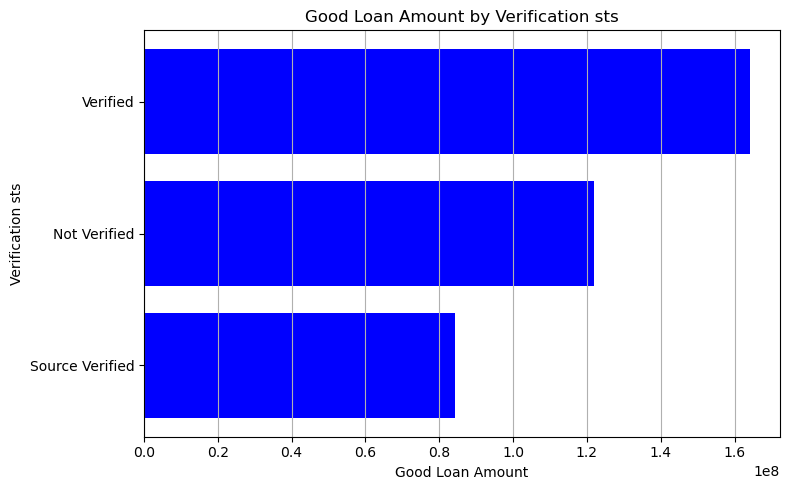

In [28]:
#verification sts
paid_off_vfs = paid_off.groupby('verification_status')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(paid_off_vfs.index, paid_off_vfs.values, color='blue')
plt.xlabel('Good Loan Amount')
plt.ylabel('Verification sts')
plt.title('Good Loan Amount by Verification sts')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\Daksh\AppData\Local\Temp\ipykernel_15176\4190230718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_off['int_rate'] = paid_off['int_rate'] * 100


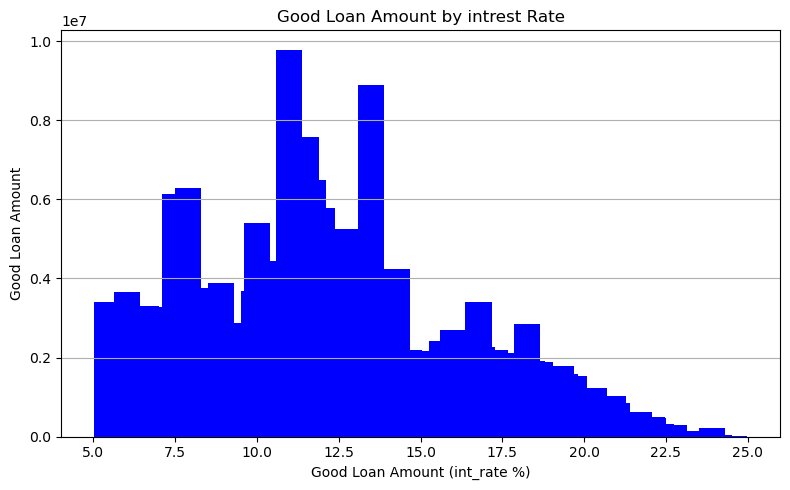

C:\Users\Daksh\AppData\Local\Temp\ipykernel_15176\4190230718.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_off['int_rate_bin'] = pd.cut(paid_off['int_rate'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Daksh\AppData\Local\Temp\ipykernel_15176\4190230718.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_by_bin = paid_off.groupby('int_rate_bin')['loan_amount'].sum()


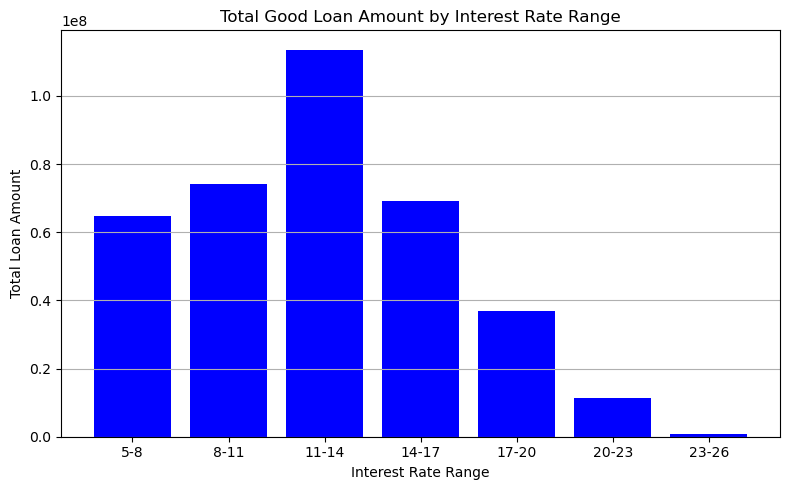

In [29]:
#intrest rate
if paid_off['int_rate'].max() <= 1.0:
     paid_off['int_rate'] = paid_off['int_rate'] * 100
    
paid_off_int_rate = paid_off.groupby('int_rate')['loan_amount'].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(paid_off_int_rate.index, paid_off_int_rate.values, color='blue')
plt.xlabel("Good Loan Amount (int_rate %)")
plt.ylabel("Good Loan Amount")
plt.title('Good Loan Amount by intrest Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

bins = [ 5, 8, 11, 14, 17, 20, 23, 26]
labels = ['5-8', '8-11', '11-14', '14-17', '17-20', '20-23', '23-26']
# Bin the interest rate column
paid_off['int_rate_bin'] = pd.cut(paid_off['int_rate'], bins=bins, labels=labels, include_lowest=True)
loan_amount_by_bin = paid_off.groupby('int_rate_bin')['loan_amount'].sum()
plt.figure(figsize=(8, 5))
plt.bar(loan_amount_by_bin.index.astype(str), loan_amount_by_bin.values, color='blue')
plt.xlabel('Interest Rate Range')
plt.ylabel('Total Loan Amount')
plt.title('Total Good Loan Amount by Interest Rate Range')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
# Weighted Average Loan Age
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')
today = datetime.today()
df['loan_age_days'] = (today - df['issue_date']).dt.days
weighted_avg_age_days = (df['loan_age_days'] * df['loan_amount']).sum() / df['loan_amount'].sum()
weighted_avg_age_years = weighted_avg_age_days / 365

print("Weighted Average Loan Age (days) {:.0f} Days".format(weighted_avg_age_days))
print("Weighted Average Loan Age (years) {:.0f} Years".format(weighted_avg_age_years))

Weighted Average Loan Age (days) 1492 Days
Weighted Average Loan Age (years) 4 Years


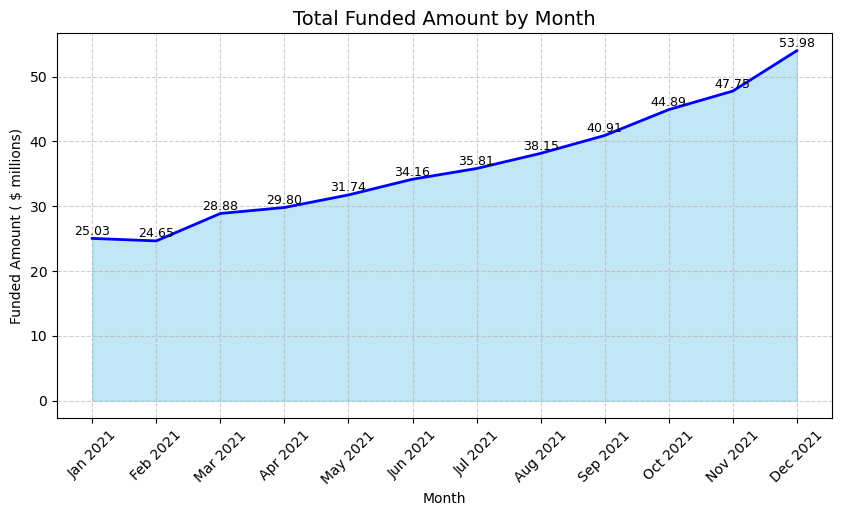

In [33]:
 #Monthly trends by issue data for total funded amount 
monthly_funded= (df.sort_values('issue_date').assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')).groupby('month_name', sort=False)
                 ['loan_amount'].sum().div(1000000).reset_index(name='loan_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
    
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ( $ millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout
plt.show()

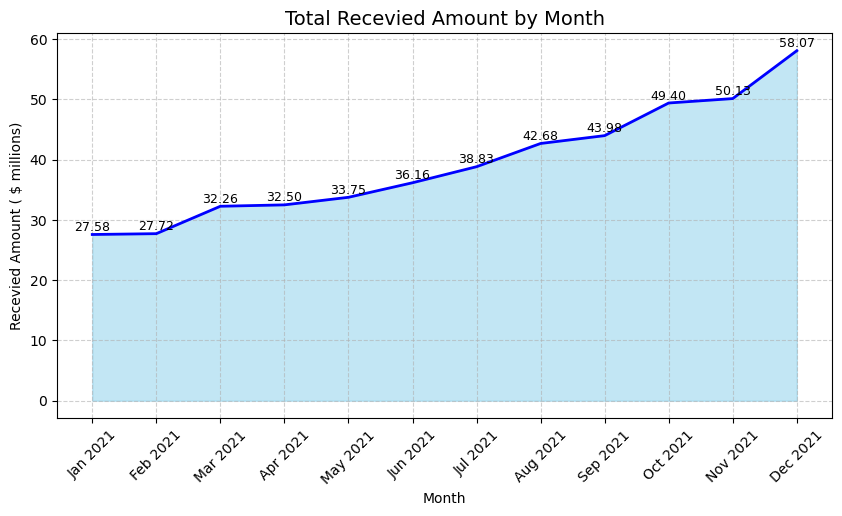

In [34]:
 #Monthly trends by issue data for total  amount recevied
monthly_recevied= (df.sort_values('issue_date').assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')).groupby('month_name', sort=False)
                 ['total_payment'].sum().div(1000000).reset_index(name='recevied_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_recevied['month_name'], monthly_recevied['recevied_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_recevied['month_name'], monthly_recevied['recevied_amount_millions'], color='blue', linewidth=2)
for i, row in monthly_recevied.iterrows():
    plt.text(i, row['recevied_amount_millions'] + 0.1, f"{row['recevied_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
    
plt.title('Total Recevied Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Recevied Amount ( $ millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels= monthly_recevied['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout
plt.show()

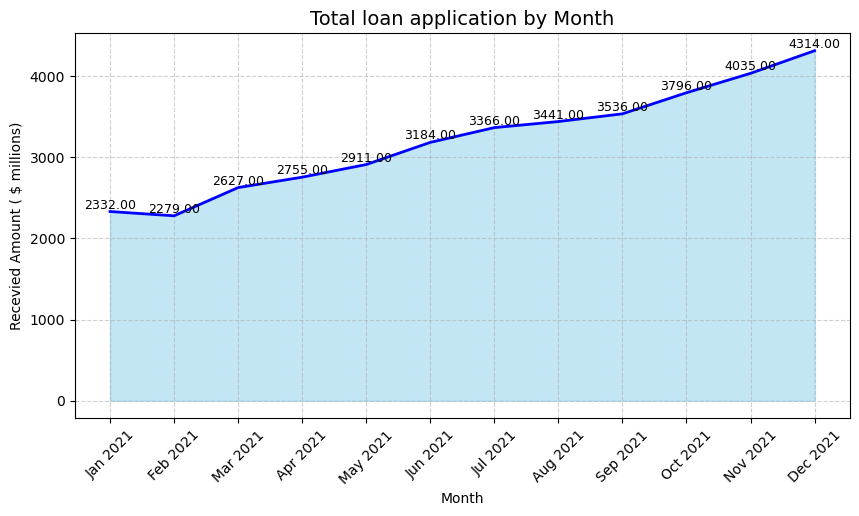

In [35]:
 #Monthly trends by issue data for total loan application
total_application= (df.sort_values('issue_date').assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')).groupby('month_name', sort=False)
                 ['id'].count().reset_index(name='total_loan_application'))

plt.figure(figsize=(10,5))
plt.fill_between(total_application['month_name'], total_application['total_loan_application'], color='skyblue', alpha=0.5)
plt.plot(total_application['month_name'], total_application['total_loan_application'], color='blue', linewidth=2)
for i, row in total_application.iterrows():
    plt.text(i, row['total_loan_application'] + 0.5, f"{row['total_loan_application']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
    
plt.title('Total loan application by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Recevied Amount ( $ millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels= total_application['month_name'], rotation=45)
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout
plt.show()

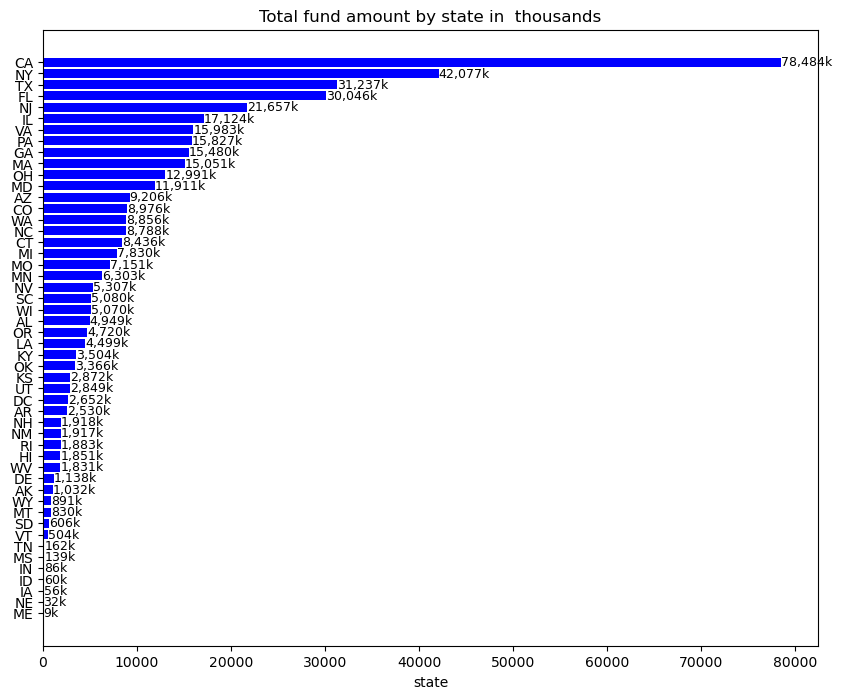

In [36]:
#Regional Analysis by State for total funded amount 

state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands= state_funding/1000

plt.figure(figsize=(10,8))
bars=plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='blue')

for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Total fund amount by state in  thousands')
plt.xlabel('state')
plt.tight_layout
plt.show()

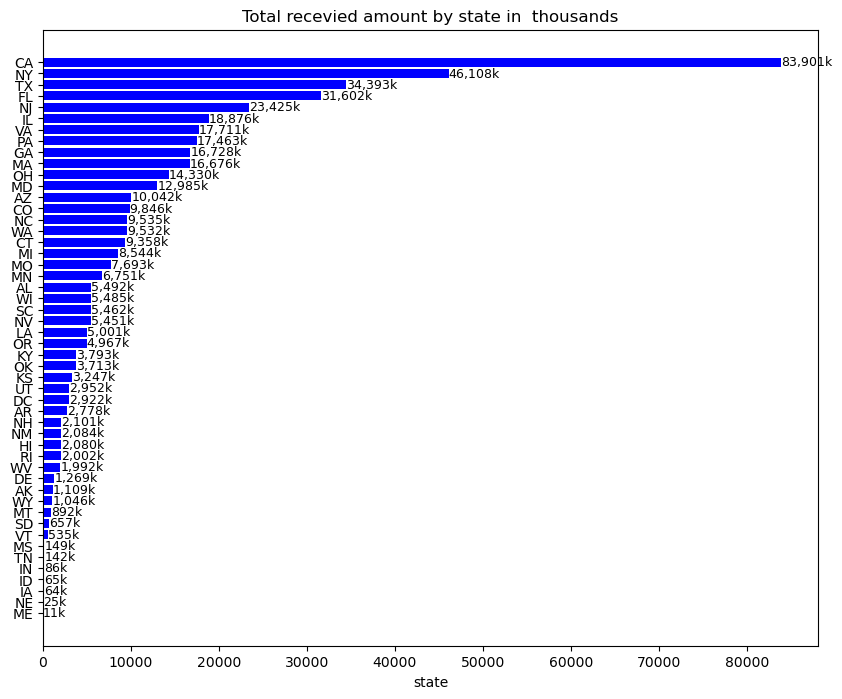

In [37]:
#Regional Analysis by State for total amount recevied 

state_amount = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_amount_thousands= state_amount/1000

plt.figure(figsize=(10,8))
bars=plt.barh(state_amount_thousands.index, state_amount_thousands.values, color='blue')

for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Total recevied amount by state in  thousands')
plt.xlabel('state')
plt.tight_layout
plt.show()

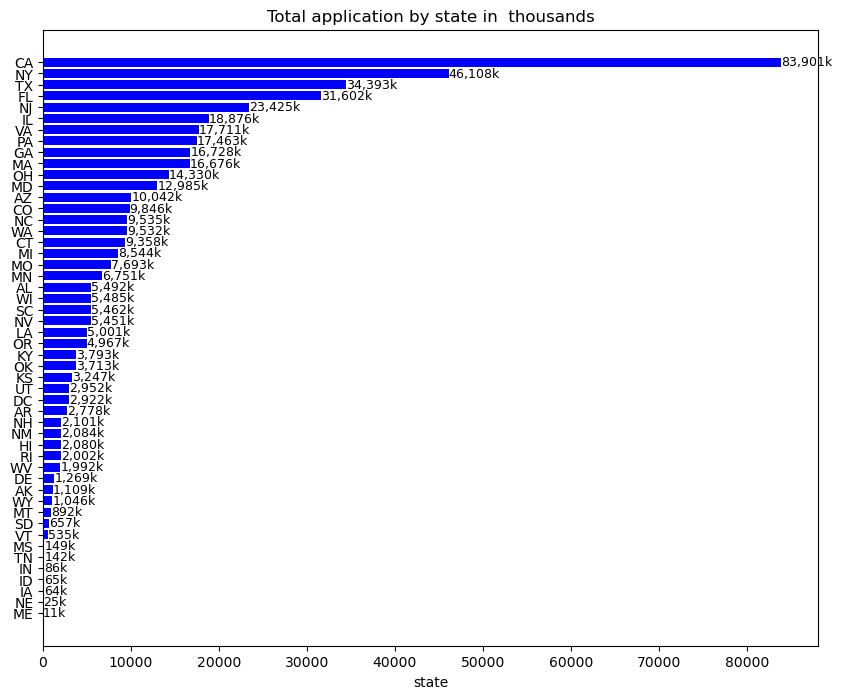

In [38]:
#Regional Analysis by State for application

state_application = df.groupby('address_state')['id'].count().sort_values(ascending=True)
state_applicationt_thousands= state_amount/1000

plt.figure(figsize=(10,8))
bars=plt.barh(state_applicationt_thousands.index, state_applicationt_thousands.values, color='blue')

for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Total application by state in  thousands')
plt.xlabel('state')
plt.tight_layout
plt.show()

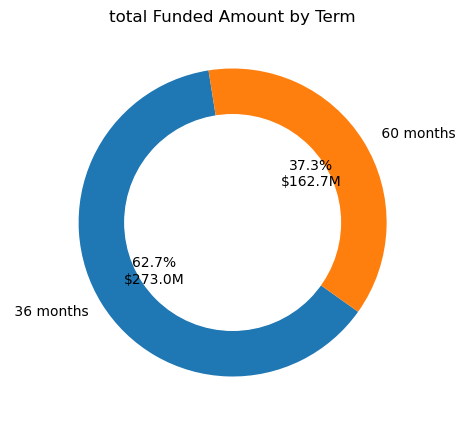

In [39]:
#Loan Term Analysis by total funded amount 
term_funding_millions= df.groupby('term')['loan_amount'].sum()/1000000
plt.figure(figsize=(5,5))
plt.pie(term_funding_millions, labels=term_funding_millions.index, autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",startangle=99,wedgeprops={'width': 0.4})
plt.gca().add_artist(plt.Circle((0,0), 0.70,color= 'white'))
plt.title("total Funded Amount by Term")
plt.show()


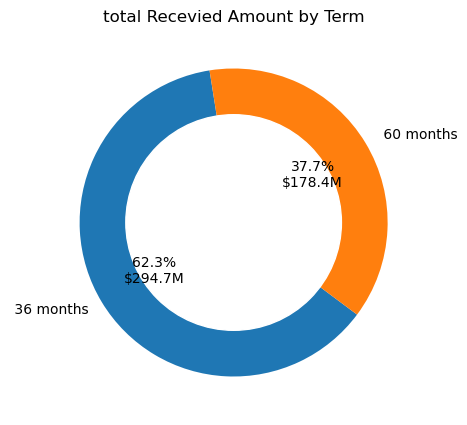

In [40]:
#Loan Term Analysis by total Recevied amount 
term_recevied_millions= df.groupby('term')['total_payment'].sum()/1000000
plt.figure(figsize=(5,5))
plt.pie(term_recevied_millions, labels=term_recevied_millions.index, autopct=lambda p: f"{p:.1f}%\n${p*sum(term_recevied_millions)/100:.1f}M",startangle=99,wedgeprops={'width': 0.4})
plt.gca().add_artist(plt.Circle((0,0), 0.70,color= 'white'))
plt.title("total Recevied Amount by Term")
plt.show()


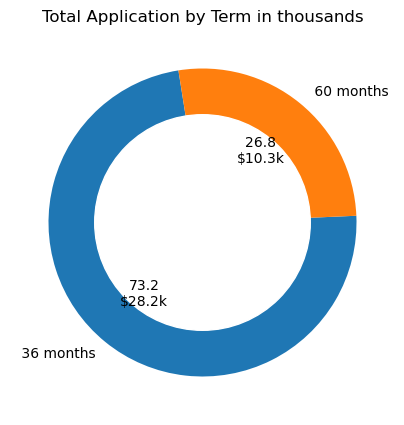

In [41]:
#Loan Term Analysis by total application
term_application_thousands= df.groupby('term')['id'].count()/1000
plt.figure(figsize=(5,5))
plt.pie(term_application_thousands, labels=term_application_thousands.index, autopct=lambda p: f"{p:.1f}\n${p*sum(term_application_thousands)/100:.1f}k",startangle=99,wedgeprops={'width': 0.4})
plt.gca().add_artist(plt.Circle((0,0), 0.70,color= 'white'))
plt.title("Total Application by Term in thousands")
plt.show()



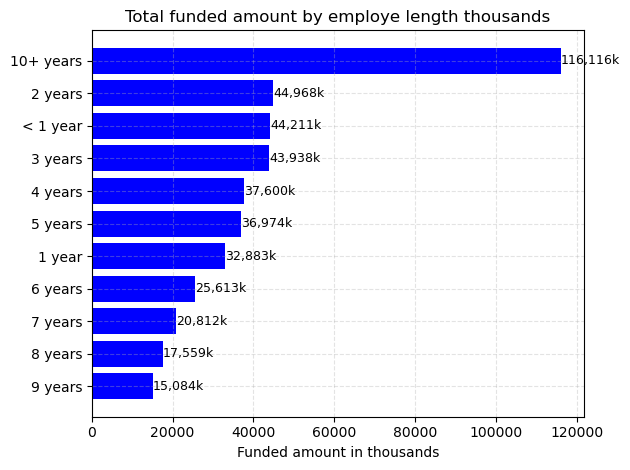

In [42]:
#Employee Length Analysis by funded amount 
emp_funding_thousands= df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Total funded amount by employe length thousands')
plt.xlabel('Funded amount in thousands')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


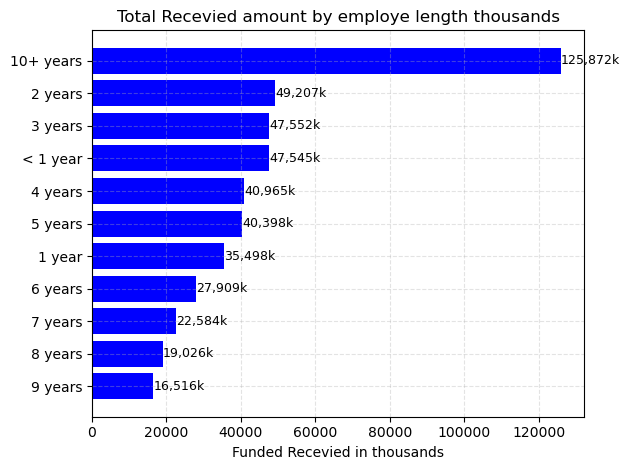

In [43]:
#Employee Length Analysis by recevied amount 
emp_recevied_thousands= df.groupby('emp_length')['total_payment'].sum().sort_values()/1000
bars = plt.barh(emp_recevied_thousands.index, emp_recevied_thousands, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Total Recevied amount by employe length thousands')
plt.xlabel('Funded Recevied in thousands')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


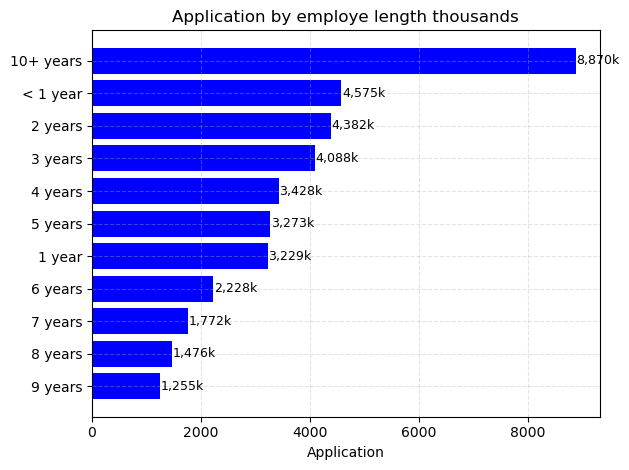

In [44]:
#Employee Length Analysis by application
emp_application= df.groupby('emp_length')['id'].count().sort_values()
bars = plt.barh(emp_application.index, emp_application, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)
plt.title('Application by employe length thousands')
plt.xlabel('Application')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


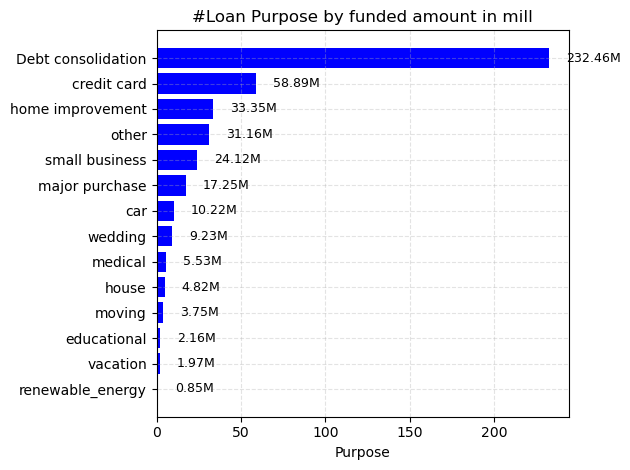

In [45]:
#Loan Purpose by funded amount 
loan_purpose_funded= df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000
bars = plt.barh(loan_purpose_funded.index, loan_purpose_funded, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)
plt.title('#Loan Purpose by funded amount in mill')
plt.xlabel('Purpose')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


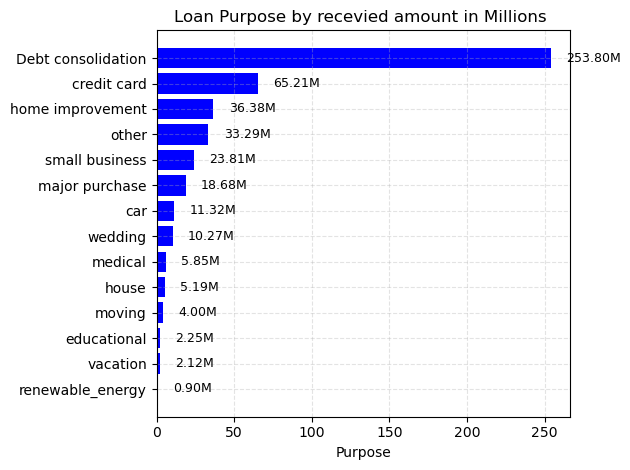

In [46]:
#Loan Purpose by recevied amount 
loan_purpose_recevied= df.groupby('purpose')['total_payment'].sum().sort_values()/1000000
bars = plt.barh(loan_purpose_recevied.index, loan_purpose_recevied, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)
plt.title('Loan Purpose by recevied amount in Millions ')
plt.xlabel('Purpose')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

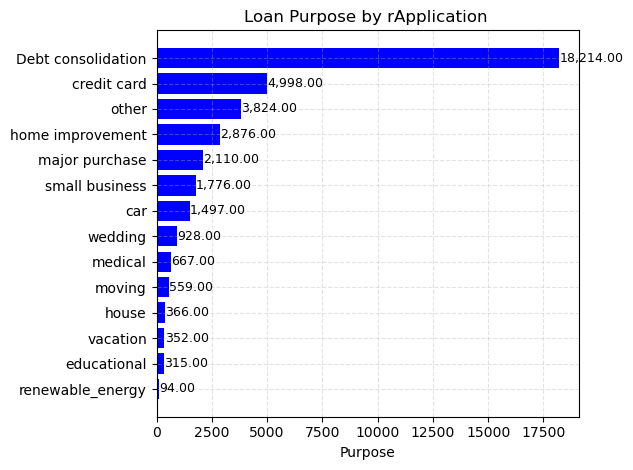

In [47]:
#Loan Purpose by Application 
loan_purpose_application= df.groupby('purpose')['id'].count().sort_values()
bars = plt.barh(loan_purpose_application.index, loan_purpose_application, color='blue')
for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}', va='center', fontsize=9)
plt.title('Loan Purpose by rApplication ')
plt.xlabel('Purpose')
plt.grid(linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


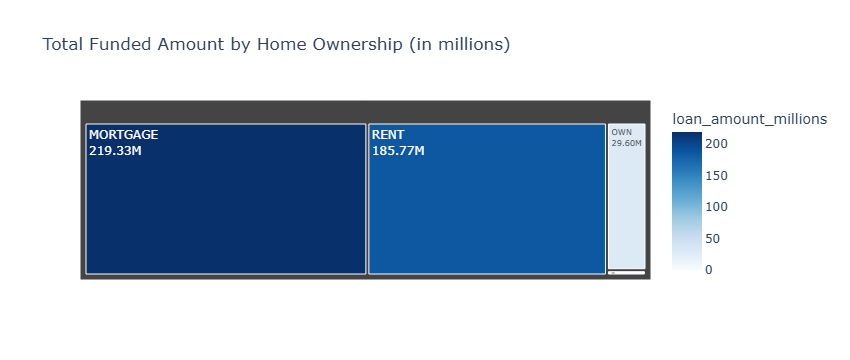

In [48]:
#home ownership by funded Amount 
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']= home_funding['loan_amount']/1_000_000
fig = px.treemap(home_funding, path=['home_ownership'], values='loan_amount_millions', color='loan_amount_millions', color_continuous_scale='Blues',
                 title="Total Funded Amount by Home Ownership (in millions)")
fig.update_traces(texttemplate="%{label}<br>%{value:.2f}M")
fig.show()


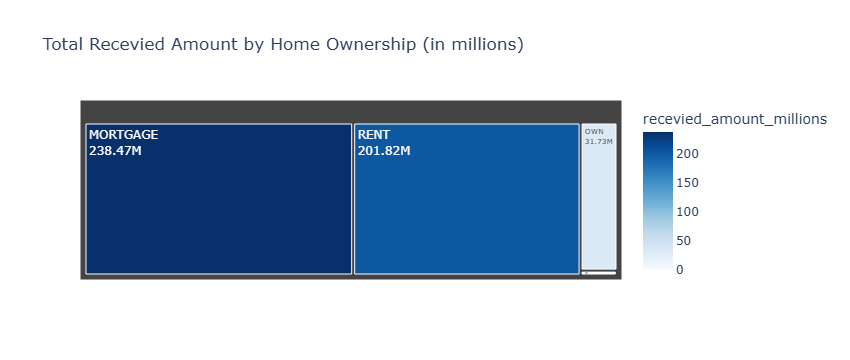

In [49]:
#home ownership by recevied Amount 
home_recevied = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_recevied['recevied_amount_millions']= home_recevied['total_payment']/1_000_000
fig = px.treemap(home_recevied, path=['home_ownership'], values='recevied_amount_millions', color='recevied_amount_millions', color_continuous_scale='Blues',
                 title="Total Recevied Amount by Home Ownership (in millions)")
fig.update_traces(texttemplate="%{label}<br>%{value:.2f}M")
fig.show()
